# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import ticker
from matplotlib.axis import Axis

# Collect/Clean Data

Data included in the spreadsheet was pulled from ziprecuiter ([example](https://www.ziprecruiter.com/Salaries/What-Is-the-Average-Data-Manager-Salary-by-State)) and is from October 2023.

In [2]:
# import/combine data

da = pd.read_excel('Data_Professionals_Salary_Data.xlsx', sheet_name='Data Analyst')
da['title'] = 'Data Analyst'
ds = pd.read_excel('Data_Professionals_Salary_Data.xlsx', sheet_name='Data Scientist')
ds['title'] = 'Data Scientist'
de = pd.read_excel('Data_Professionals_Salary_Data.xlsx', sheet_name='Data Engineer')
de['title'] = 'Data Engineer'
mle = pd.read_excel('Data_Professionals_Salary_Data.xlsx', sheet_name='Machine Learning Engineer')
mle['title'] = 'Machine Learning Engineer'
dm = pd.read_excel('Data_Professionals_Salary_Data.xlsx', sheet_name='Data Manager')
dm['title'] = 'Data Manager'
ba = pd.read_excel('Data_Professionals_Salary_Data.xlsx', sheet_name='Business Analyst')
ba['title'] = 'Business Analyst'

df = pd.concat([da, ds, de, mle, dm])
df['state'] = df['state'].str.lower()

In [3]:
# combine with states.csv to get state abbreviations

states = pd.read_csv('states.csv')
states.columns = ['state', 'code']
states['state'] = states['state'].str.lower()
states.head()
df = pd.merge(df, states, how='inner', on='state')

In [4]:
# select pertinent columns 

df = df[['code', 'title', 'salary']]
df.head()

,code,title,salary
0,NY,Data Analyst,98238
1,NY,Data Scientist,145027
2,NY,Data Engineer,134797
3,NY,Machine Learning Engineer,149475
4,NY,Data Manager,123691


# Create Figures

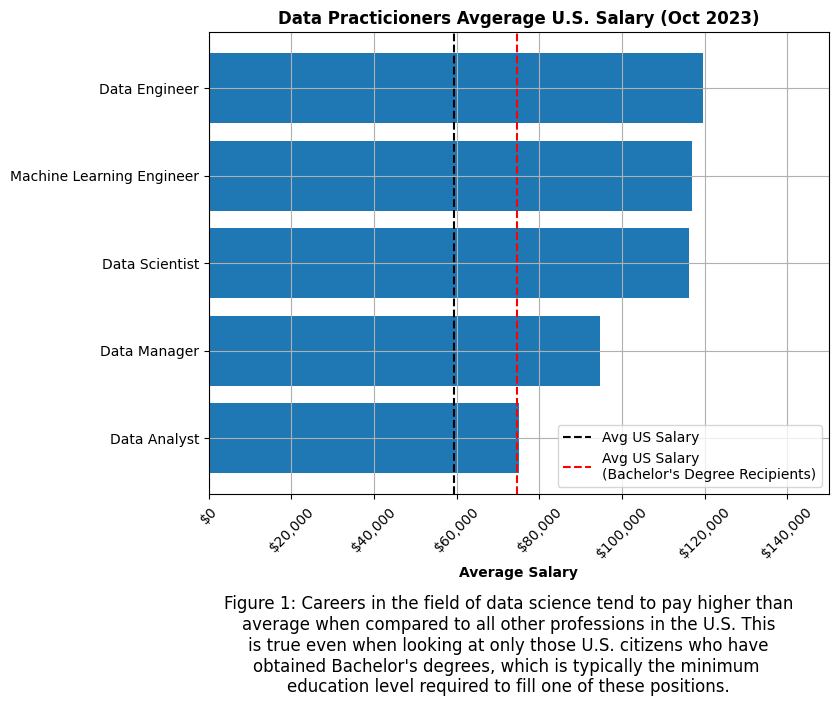

In [5]:
# create graph of average U.S. salaries for each data position

fig, ax = plt.subplots(figsize=(8,6)) 

plt_data = df.groupby(by='title').mean(numeric_only=True).reset_index().sort_values(by='salary')
avg_us_salary = 59228 
avg_bach_us_salary = 74464

ax.barh(plt_data.title, plt_data.salary)
plt.title('Data Practicioners Avgerage U.S. Salary (Oct 2023)', fontweight='bold')
plt.xlabel('Average Salary', fontweight='bold')
plt.axvline(avg_us_salary, label='Avg US Salary', color='black', ls='--')
plt.axvline(avg_bach_us_salary, label='Avg US Salary \n(Bachelor\'s Degree Recipients)', color='red', ls='--')
formatter = ticker.StrMethodFormatter('${x:,.0f}')
Axis.set_major_formatter(ax.xaxis, formatter) 
plt.xlim(0, 150000)
plt.xticks(rotation=45)

plt.legend()
plt.grid()

caption = '''
Figure 1: Careers in the field of data science tend to pay higher than
average when compared to all other professions in the U.S. This
is true even when looking at only those U.S. citizens who have
obtained Bachelor's degrees, which is typically the minimum 
education level required to fill one of these positions.
'''
plt.figtext(0.5, -0.25, caption, wrap=True, horizontalalignment='center', fontsize=12)
plt.show()


In [6]:
# create dataframe for next plot

all_jobs = pd.read_excel('Data_Professionals_Salary_Data.xlsx', sheet_name='All Professions')
all_jobs['state'] = all_jobs['state'].str.lower()
all_jobs = pd.merge(all_jobs, states, on='state', how='inner')
all_jobs = all_jobs[['code', 'salary']]

plt_data = df.groupby(by='code').mean(numeric_only=True).reset_index().sort_values(by='salary')
plt_data = pd.merge(plt_data, all_jobs, how='inner', on='code', suffixes=('_data', '_all'))

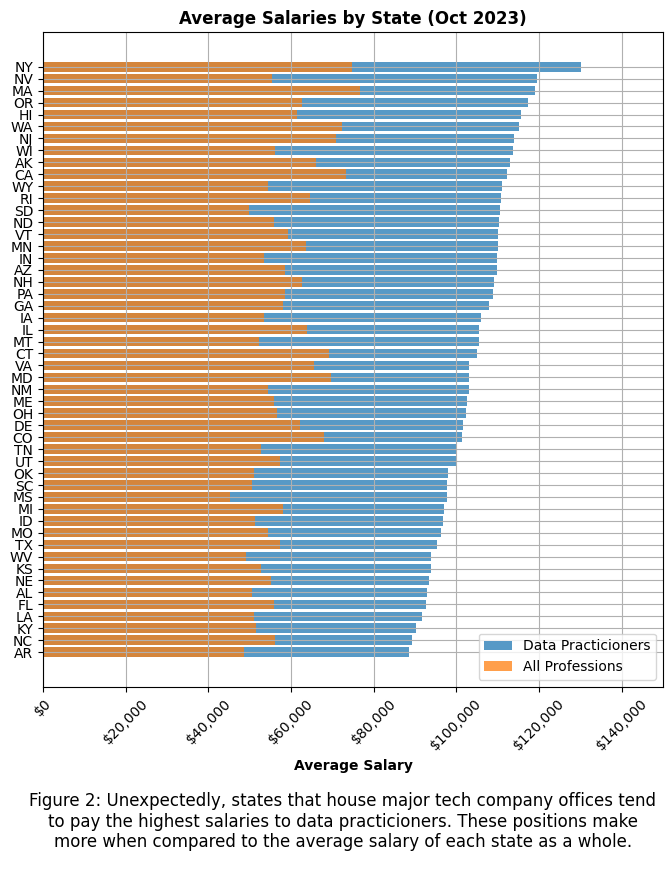

In [7]:
# create plot of average US salary by state

fig, ax = plt.subplots(figsize=(8,8.5)) 

ax.barh(plt_data.code, plt_data.salary_data, alpha=0.75, label='Data Practicioners')
ax.barh(plt_data.code, plt_data.salary_all, alpha=0.75, label='All Professions')

plt.title('Average Salaries by State (Oct 2023)', fontweight='bold')
plt.xlabel('Average Salary', fontweight='bold')

formatter = ticker.StrMethodFormatter('${x:,.0f}')
Axis.set_major_formatter(ax.xaxis, formatter) 
plt.xlim(0, 150000)
plt.xticks(rotation=45)

plt.legend()
plt.grid()

caption = '''
Figure 2: Unexpectedly, states that house major tech company offices tend
to pay the highest salaries to data practicioners. These positions make
more when compared to the average salary of each state as a whole.
'''
plt.figtext(0.5, -0.1, caption, wrap=True, horizontalalignment='center', fontsize=12)
plt.show()

In [8]:
# prepare dataset for next figure

cli = pd.read_csv('cost-of-living-index-by-state-updated-june-2023.csv')
cli = cli[['2023', 'state']]
cli.columns = ['cli', 'state']
cli['state'] = cli['state'].str.lower()
cli = pd.merge(cli, states, how='inner', on='state')
cli = cli[['code', 'cli']]

plt_data = pd.merge(plt_data, cli)
plt_data['salary_data_adj'] = 100 * plt_data['salary_data'] / plt_data['cli']
plt_data['salary_all_adj'] = 100 * plt_data['salary_all'] / plt_data['cli']
plt_data = plt_data.sort_values(by='salary_data_adj').reset_index()

low_cli = plt_data[plt_data['cli'] < 100]['code'].index.values

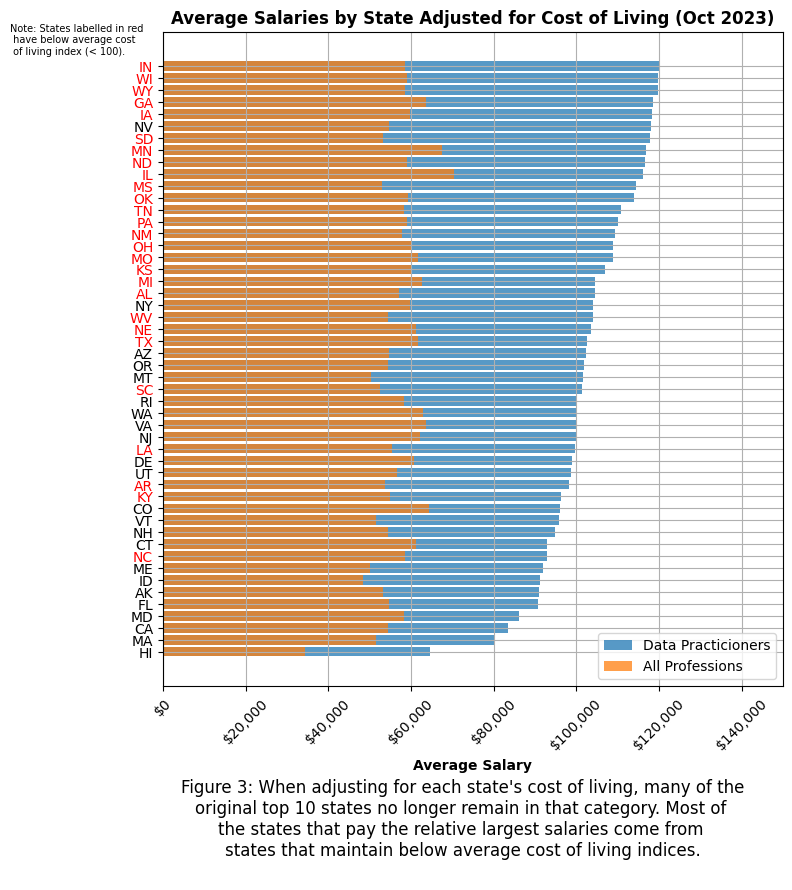

In [9]:
# create plot of average US salary by state, adjusted for cost of living 

fig, ax = plt.subplots(figsize=(8,8.5)) 

# plot bar graphs
ax.barh(plt_data.code, plt_data.salary_data_adj, alpha=0.75, label='Data Practicioners')
ax.barh(plt_data.code, plt_data.salary_all_adj, alpha=0.75, label='All Professions')

# include title
plt.title('Average Salaries by State Adjusted for Cost of Living (Oct 2023)', fontweight='bold')

# format x-axis
plt.xlabel('Average Salary', fontweight='bold')
formatter = ticker.StrMethodFormatter('${x:,.0f}')
Axis.set_major_formatter(ax.xaxis, formatter) 
plt.xticks(rotation=45)
plt.xlim(0, 150000)

# format y-axis
labels = ax.get_yticklabels()
ticks = ax.get_yticks()
for label, tick in zip(labels, ticks):
    if tick in low_cli:
        print(label.get_text())
        label = label.set_color('r')
        
# render plot
plt.text(-37000, 50, 'Note: States labelled in red\n have below average cost\n of living index (< 100).', fontsize=7)
plt.legend()

caption = '''
Figure 3: When adjusting for each state's cost of living, many of the
original top 10 states no longer remain in that category. Most of 
the states that pay the relative largest salaries come from 
states that maintain below average cost of living indices.
'''
plt.figtext(0.5, -0.11, caption, wrap=True, horizontalalignment='center', fontsize=12)
plt.grid()
plt.show()